In [1]:
import glob
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
import librosa.display
import tensorflow as tf
import pandas as pd
from matplotlib.pyplot import specgram
%matplotlib inline


/anaconda3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


In [2]:
training_data = pd.read_csv("../train-002/train.csv")

In [3]:

training_data["Path"] = "../train-002/Train/" + training_data["ID"].map(str) + ".wav"
training_data.head()

,ID,Class,Path
0,0,siren,../train-002/Train/0.wav
1,1,street_music,../train-002/Train/1.wav
2,2,drilling,../train-002/Train/2.wav
3,3,siren,../train-002/Train/3.wav
4,4,dog_bark,../train-002/Train/4.wav


In [4]:
def load_sound_files(file_paths):
    raw_sounds = []
    for fp in file_paths:
        X,sr = librosa.load(fp)
        raw_sounds.append(X)
    return raw_sounds

In [5]:
def plot_waves(data):
    i = 1
    sound_names = data["Class"].tolist()
    raw_sounds = load_sound_files(data["Path"].tolist())
    fig = plt.figure(figsize=(25,60))
    for n,f in zip(sound_names,raw_sounds):
        plt.subplot(10,1,i)
        librosa.display.waveplot(np.array(f),sr=22050)
        plt.title(n)
        i += 1
    plt.suptitle("Figure 1: Waveplot",x=0.5, y=0.915,fontsize=18)
    plt.show()

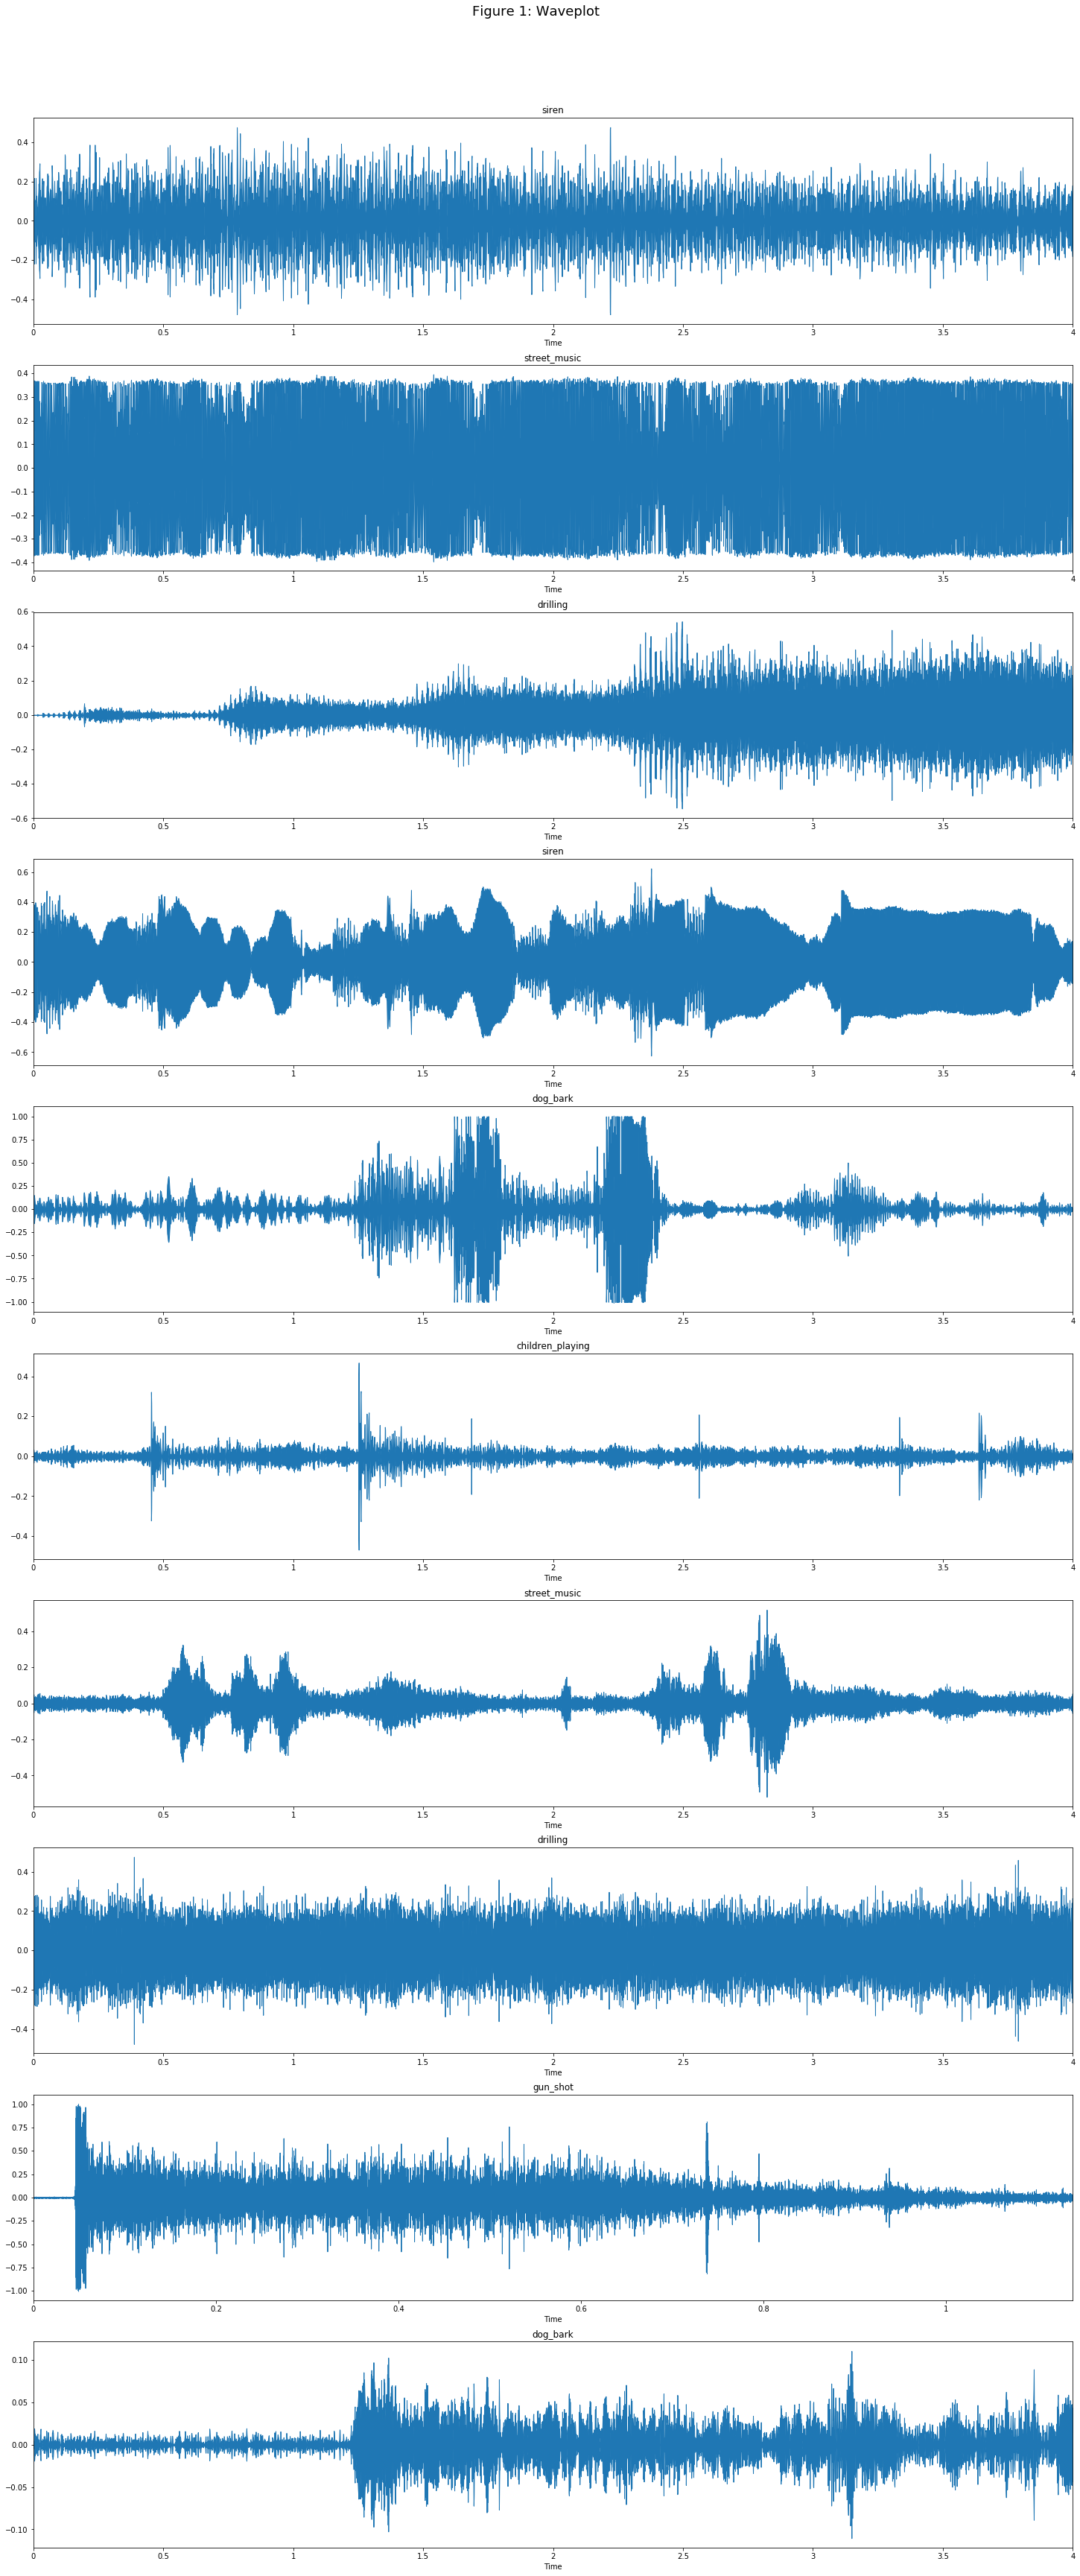

In [6]:
plot_waves(training_data[:10])

In [7]:
#spectograms
def plot_specgram(data):
    sound_names = data["Class"].tolist()
    raw_sounds = load_sound_files(data["Path"].tolist())
    i = 1
    fig = plt.figure(figsize=(25,60))
    for n,f in zip(sound_names,raw_sounds):
        plt.subplot(10,1,i)
        specgram(np.array(f), Fs=22050)
        plt.title(n.title())
        i += 1
    plt.suptitle("Figure 2: Spectrogram",x=0.5, y=0.915,fontsize=18)
    plt.show()


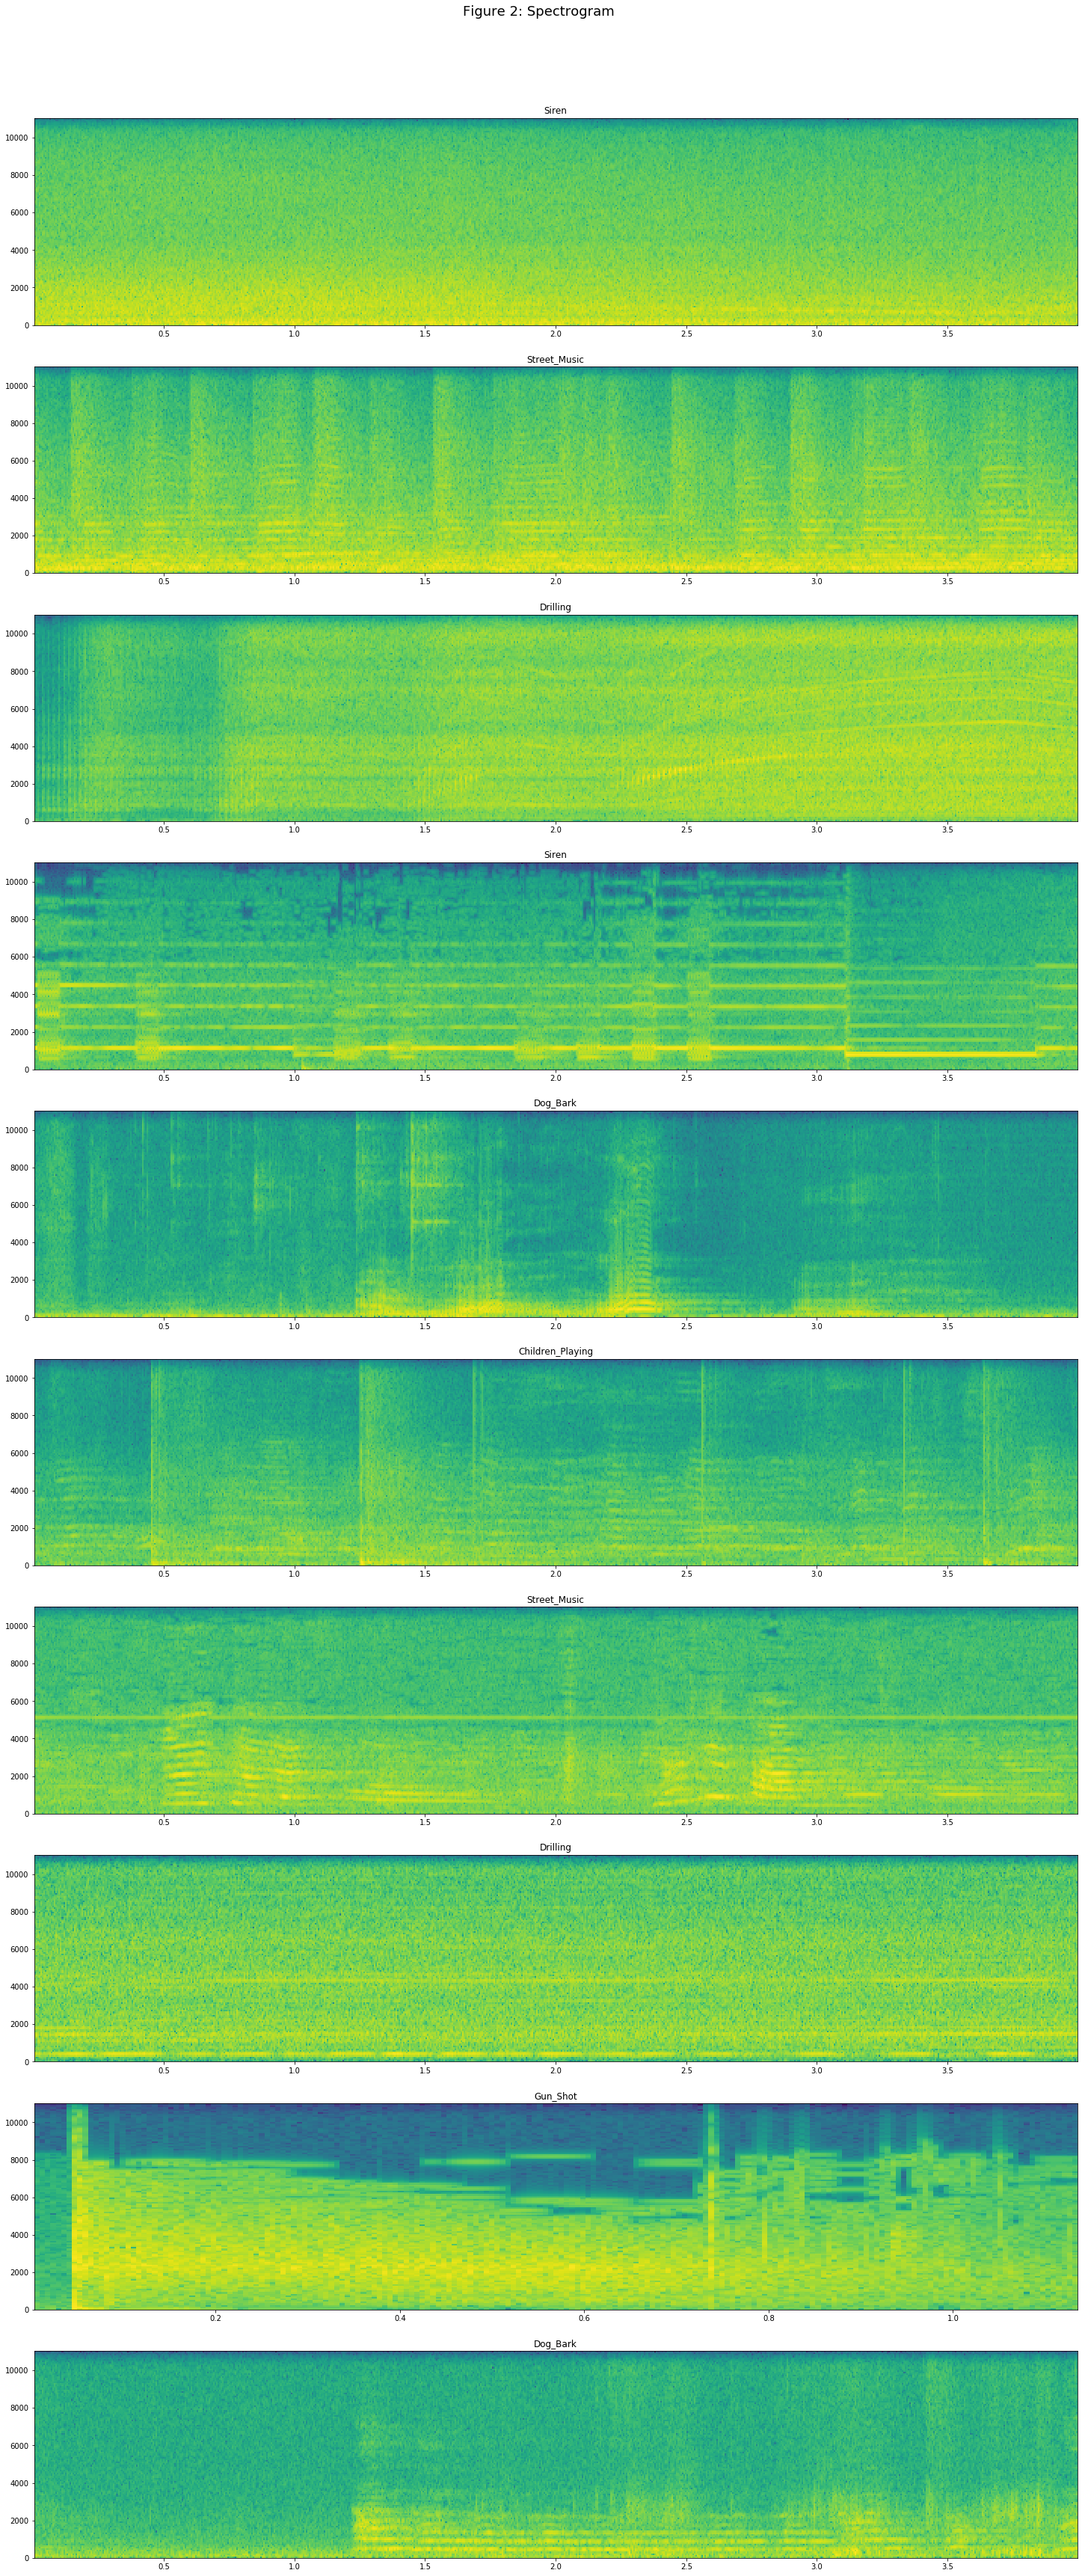

In [8]:
plot_specgram(training_data[:10])

In [56]:
sample_sound = load_sound_files([training_data["Path"][1]])
melspec1 = librosa.feature.melspectrogram(np.array(sample_sound).flatten())

In [57]:
melspec.shape

(128, 173)

In [58]:
sample_sound = load_sound_files([training_data["Path"][2]])
melspec2 = librosa.feature.melspectrogram(np.array(sample_sound).flatten())
melspec.shape

(128, 173)

In [59]:
print(np.mean(melspec1))

11.3644420602


In [60]:
print(np.mean(melspec2))

0.619567185271


In [61]:
training_data.head(10)

,ID,Class,Path
0,0,siren,../train-002/Train/0.wav
1,1,street_music,../train-002/Train/1.wav
2,2,drilling,../train-002/Train/2.wav
3,3,siren,../train-002/Train/3.wav
4,4,dog_bark,../train-002/Train/4.wav
5,6,children_playing,../train-002/Train/6.wav
6,10,street_music,../train-002/Train/10.wav
7,11,drilling,../train-002/Train/11.wav
8,12,gun_shot,../train-002/Train/12.wav
9,15,dog_bark,../train-002/Train/15.wav


In [62]:
dog_bark1 = load_sound_files([training_data["Path"][4]])
dog_bark1_melspec = np.mean(librosa.feature.melspectrogram(np.array(dog_bark1).flatten()))
dog_bark2 = load_sound_files([training_data["Path"][9]])
dog_bark2_melspec = np.mean(librosa.feature.melspectrogram(np.array(dog_bark2).flatten()))


In [63]:
print(dog_bark1_melspec, dog_bark2_melspec)

9.61674822449 0.0633202556255


In [65]:
training_data["Path"][4]

'../train-002/Train/4.wav'

In [9]:
def extract_feature(file_name):
    #From http://aqibsaeed.github.io/2016-09-03-urban-sound-classification-part-1/
    X, sample_rate = librosa.load(file_name)
    stft = np.abs(librosa.stft(X))
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
    mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X),sr=sample_rate).T,axis=0)
    return mfccs,chroma,mel,contrast,tonnetz

In [42]:
def parse_file(file_name):
    try:
        mfccs, chroma, mel, contrast,tonnetz = extract_feature(file_name)
        ext_features = np.hstack([mfccs,chroma,mel,contrast,tonnetz])
        return np.array(ext_features)
    except Exception as e:
        print("Error encountered while parsing file: ", file_name)
        return np.array(0)




In [43]:
training_data['features'] = None
for i in range(0,training_data.shape[0]):
    #print(training_data.iloc[i]["Path"])
    training_data.at[i,'features'] = parse_file(training_data.iloc[i]['Path'])

/anaconda3/lib/python3.5/site-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


numpy.ndarray

0


In [55]:
li

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


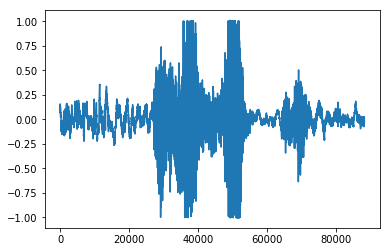

In [110]:
plt.plot(X)

In [112]:
stft = np.abs(librosa.stft(X))
stft.shape

(1025, 173)

In [113]:
mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
mfccs.shape

(40,)

In [114]:
chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
chroma.shape

(12,)

In [115]:
mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
mel.shape

(128,)

In [131]:
contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
contrast.shape


(7,)

In [132]:
tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X),sr=sample_rate).T,axis=0)
tonnetz.shape


(6,)

In [143]:
a=np.array([1,2,3])
b = np.array([[4],[5],[6]])
print(np.hstack((a,b)))
print(np.vstack((a,b)))

ValueError: all the input arrays must have same number of dimensions

In [144]:
print(a.shape)
print(b.shape)

(3,)
(3, 1)


In [ ]:
def parse_audio_files(parent_dir,sub_dirs,file_ext="*.wav"):
    features, labels = np.empty((0,193)), np.empty(0)
    for label, sub_dir in enumerate(sub_dirs):
        for fn in glob.glob(os.path.join(parent_dir, sub_dir, file_ext)):
            try:
              mfccs, chroma, mel, contrast,tonnetz = extract_feature(fn)
            except Exception as e:
              print "Error encountered while parsing file: ", fn
              continue
            ext_features = np.hstack([mfccs,chroma,mel,contrast,tonnetz])
            features = np.vstack([features,ext_features])
            labels = np.append(labels, fn.split('/')[2].split('-')[1])
    return np.array(features), np.array(labels, dtype = np.int)